# TASK 2 - UNEMPLOYMENT ANALYSIS WITH PYTHON

##### Description of the dataset

Region = states in India

Date = date which the unemployment rate observed

Frequency = measuring frequency (Monthly)

Estimated Unemployment Rate (%) = percentage of people unemployed in each States of India

Estimated Employed = The count of people currently employed

Estimated Labour Participation Rate (%) = labour force participation rate by dividing the number of people actively participating in the labour force by the total number of people eligible to participate in the labor force

longitude	

latitude

##### Importing necessary libraries

In [3]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings 
warnings.filterwarnings('ignore')

###### Loading the dataset

In [5]:
df = pd.read_csv(r"C:\Users\hp\Downloads\Unemployment_Rate_upto_11_2020.csv")
df.head()

Region        Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh  31-01-2020         M                             5.48   
1  Andhra Pradesh  29-02-2020         M                             5.83   
2  Andhra Pradesh  31-03-2020         M                             5.79   
3  Andhra Pradesh  30-04-2020         M                            20.51   
4  Andhra Pradesh  31-05-2020         M                            17.43   

   Estimated Employed  Estimated Labour Participation Rate (%) Region.1  \
0            16635535                                    41.02    South   
1            16545652                                    40.90    South   
2            15881197                                    39.18    South   
3            11336911                                    33.10    South   
4            12988845                                    36.46    South   

   Longitude  Latitude  
0    15.9129     79.74  
1    15.9129     79.74  
2    15.9129     79.74  
3    15.9129     79.74  
4    15.9129     79.74

###### Understanding the structure of the dataset

In [6]:
df.shape

(267, 9)

The unemployment dataset contains 267 instances and 9 variables.

##### Renaming the column

In [7]:
df.rename(columns={'Region.1': 'Area'}, inplace=True)

Since we have similar names for two columns we replaced Region.1 with Area which is more concise and clear.

###### Checking for missing values

In [8]:
df.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
Longitude                                  0
Latitude                                   0
dtype: int64

Null values are absent.

###### Checking for duplicate values

In [9]:
df.duplicated().sum()

0

Duplicated values are not present in the dataset.

###### Summary of the dataframe

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Area                                     267 non-null    object 
 7   Longitude                                267 non-null    float64
 8   Latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


We have 5 numerical variables and 4 categorical variables.

Number of non null values in each column is also obtained.

It also provides an estimate of the memory usage of the DataFrame. Here the memory usage is approximately 19 KB.

###### Removing unintentional spaces in columns

In [11]:
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Area                                     267 non-null    object 
 7   Longitude                                267 non-null    float64
 8   Latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


We need to ensure that the column names are consistent and free of any unwanted spaces, which can help prevent issues when referencing columns during data analysis.

###### Converting data types

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                  int64
Estimated Labour Participation Rate (%)           float64
Area                                               object
Longitude                                         float64
Latitude                                          float64
dtype: object

Here the column 'Date' was in the object type datatype so we converted it into the datetime format.

###### Summary Statistics

In [13]:

categorical_var = df.select_dtypes(include='object')
categorical_stat = categorical_var.describe().T
categorical_stat

count unique             top freq
Region      267     27  Andhra Pradesh   10
Frequency   267      1               M  267
Area        267      5           North   79

In [14]:

numerical_var = df.select_dtypes(exclude='object')
numerical_stat = numerical_var.describe().T
numerical_stat

count                           mean  \
Date                                       267  2020-06-16 09:15:30.337078528   
Estimated Unemployment Rate (%)          267.0                      12.236929   
Estimated Employed                       267.0                13962105.722846   
Estimated Labour Participation Rate (%)  267.0                      41.681573   
Longitude                                267.0                      22.826048   
Latitude                                 267.0                      80.532425   

                                                         min  \
Date                                     2020-01-31 00:00:00   
Estimated Unemployment Rate (%)                          0.5   
Estimated Employed                                  117542.0   
Estimated Labour Participation Rate (%)                16.77   
Longitude                                            10.8505   
Latitude                                             71.1924   

                                                         25%  \
Date                                     2020-03-31 00:00:00   
Estimated Unemployment Rate (%)                        4.845   
Estimated Employed                                 2838930.5   
Estimated Labour Participation Rate (%)               37.265   
Longitude                                            18.1124   
Latitude                                             76.0856   

                                                         50%  \
Date                                     2020-06-30 00:00:00   
Estimated Unemployment Rate (%)                         9.65   
Estimated Employed                                 9732417.0   
Estimated Labour Participation Rate (%)                40.39   
Longitude                                            23.6102   
Latitude                                             79.0193   

                                                         75%  \
Date                                     2020-08-31 00:00:00   
Estimated Unemployment Rate (%)                       16.755   
Estimated Employed                                21878686.0   
Estimated Labour Participation Rate (%)               44.055   
Longitude                                            27.2784   
Latitude                                             85.2799   

                                                         max              std  
Date                                     2020-10-31 00:00:00              NaN  
Estimated Unemployment Rate (%)                        75.85        10.803283  
Estimated Employed                                59433759.0  13366318.359733  
Estimated Labour Participation Rate (%)                69.69         7.845419  
Longitude                                            33.7782         6.270731  
Latitude                                             92.9376         5.831738

The mean estimated unemployment rate is high. The high unemployment rate could be attributed to the economic disruptions caused by the pandemic, such as lockdowns, reduced economic activity, and job losses in various sectors.

###### Dropping irrelevent column

In [15]:
df = df.drop('Frequency', axis=1)
df.head()

Region       Date  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2020-01-31                             5.48   
1  Andhra Pradesh 2020-02-29                             5.83   
2  Andhra Pradesh 2020-03-31                             5.79   
3  Andhra Pradesh 2020-04-30                            20.51   
4  Andhra Pradesh 2020-05-31                            17.43   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  \
0            16635535                                    41.02  South   
1            16545652                                    40.90  South   
2            15881197                                    39.18  South   
3            11336911                                    33.10  South   
4            12988845                                    36.46  South   

   Longitude  Latitude  
0    15.9129     79.74  
1    15.9129     79.74  
2    15.9129     79.74  
3    15.9129     79.74  
4    15.9129     79.74

###### Outlier detection

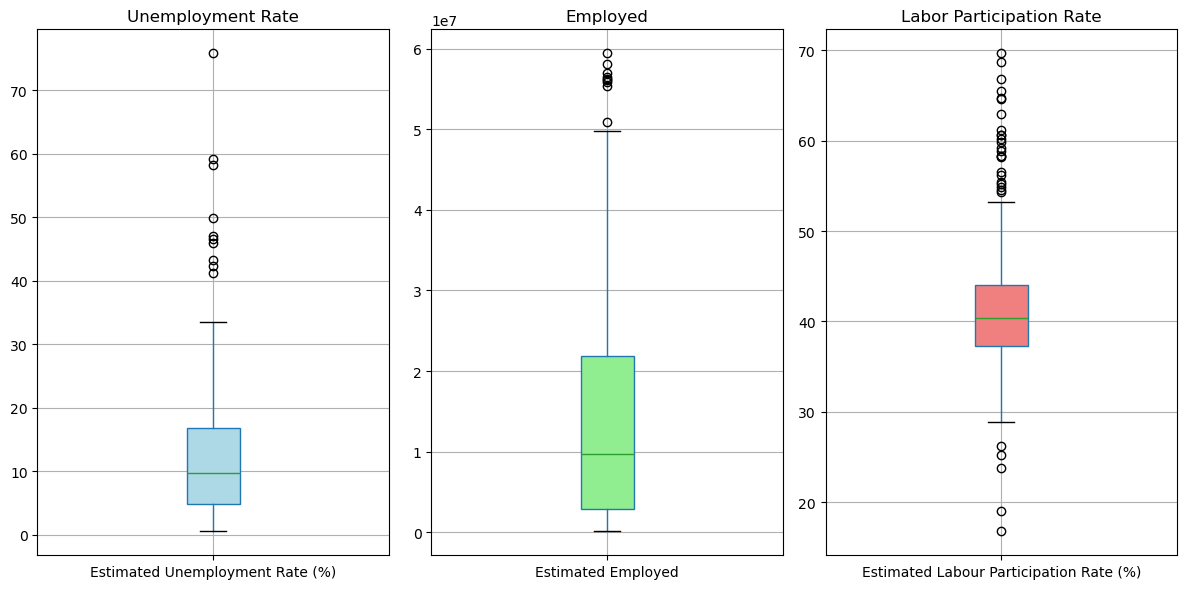

In [16]:
colors = ['lightblue', 'lightgreen', 'lightcoral']

# Create a figure with three subplots
plt.figure(figsize=(12, 6))

# Subplot 1: Unemployment Rate
plt.subplot(131)
df.boxplot(column='Estimated Unemployment Rate (%)', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[0])  # Set the color of the first box
plt.title('Unemployment Rate')

# Subplot 2: Employed
plt.subplot(132)
df.boxplot(column='Estimated Employed', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[1])  # Set the color of the second box
plt.title('Employed')

# Subplot 3: Labor Participation Rate
plt.subplot(133)
df.boxplot(column='Estimated Labour Participation Rate (%)', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[2])  # Set the color of the third box
plt.title('Labor Participation Rate')

plt.tight_layout()
plt.show()

Presence of outliers are detected. Since we are analyzing the unemployment during Covid-19 the extreme values in the data are indicative of genuine structural changes or such events therefore we are not removing it.

##### Unemployment rate in India during Covid-19

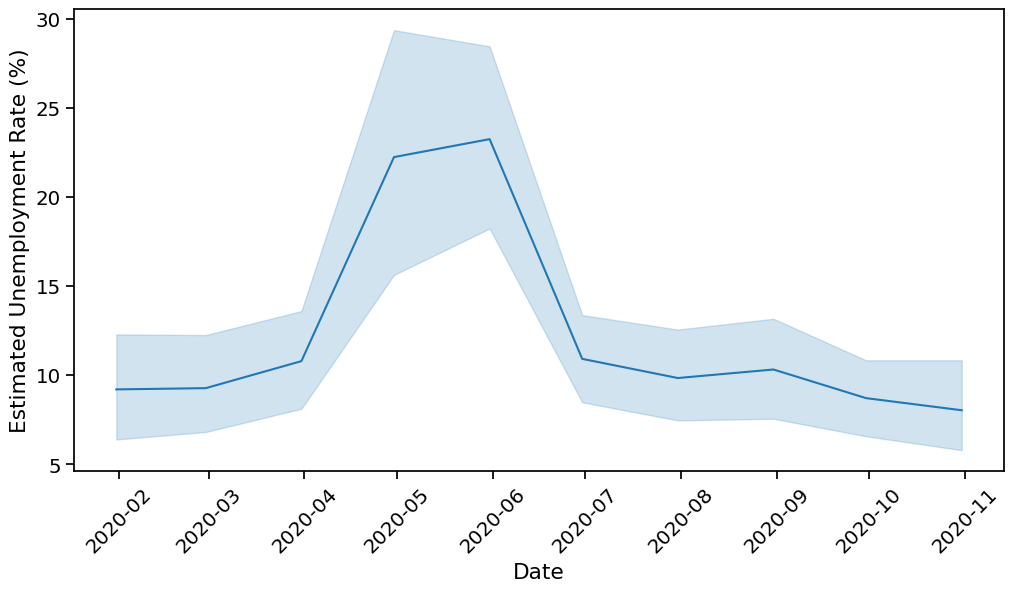

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

The months of april, may, june witnessed high unemployment rate which can be associated with the lockdowns which lead to reduced economic activity and job losses in various sectors.

###### Pair plot

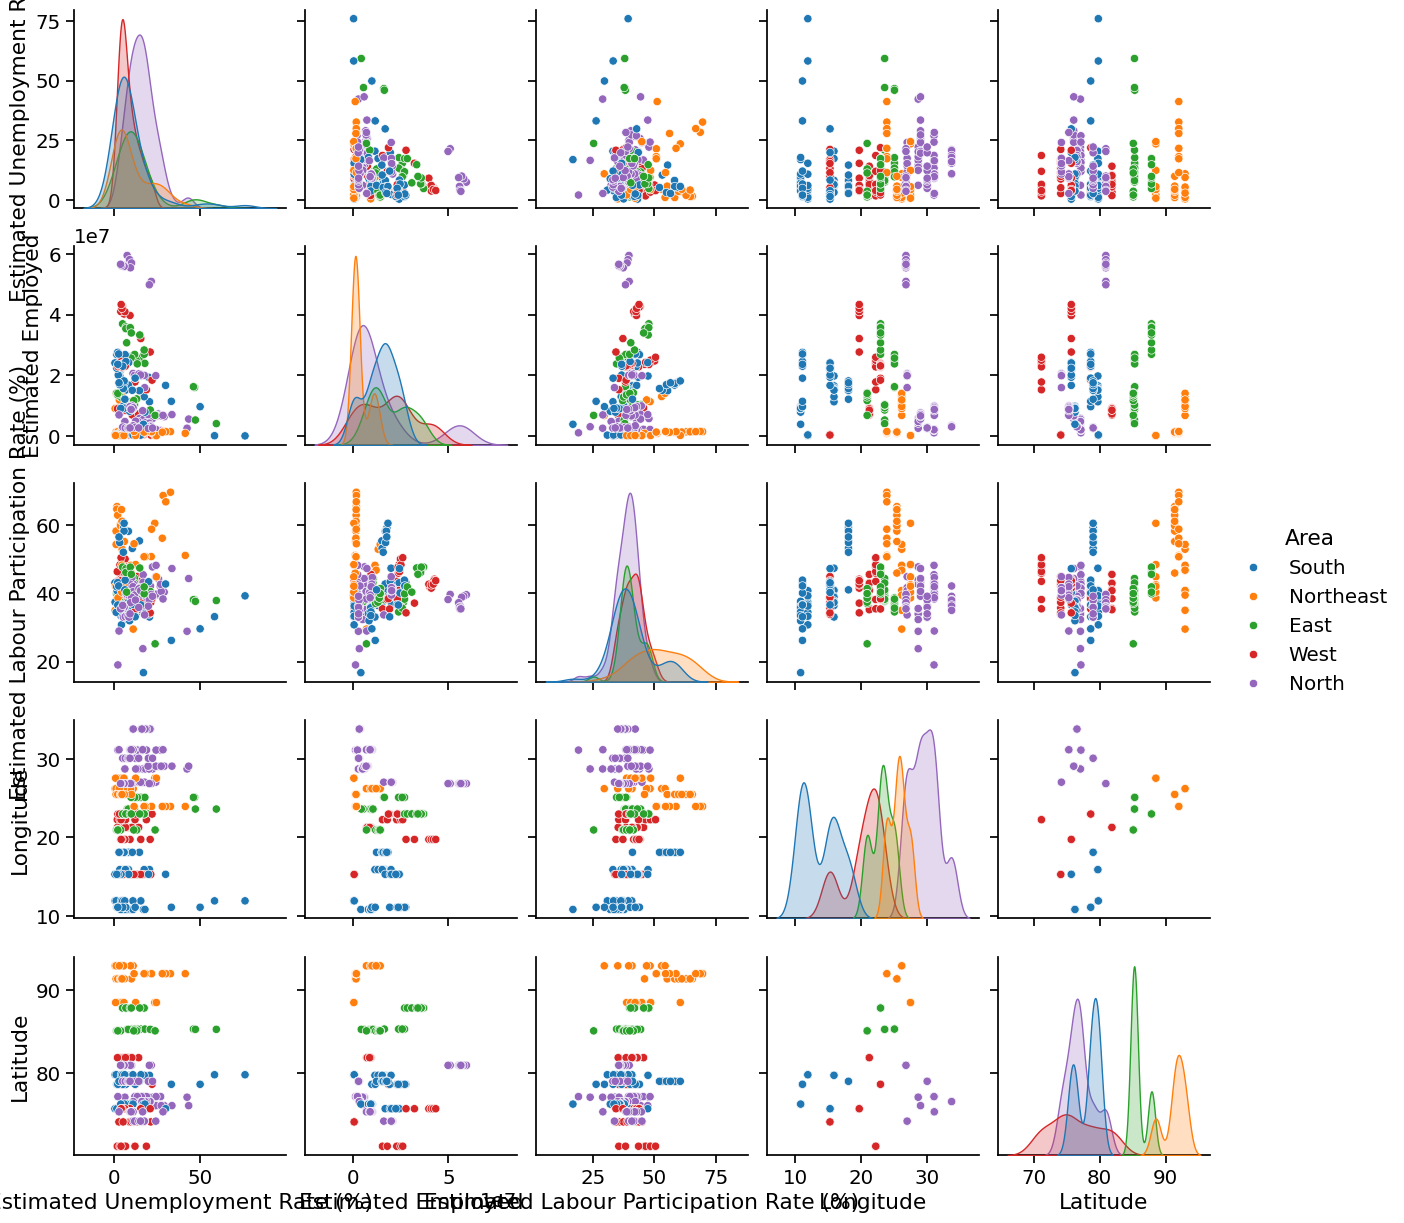

In [19]:
sns.pairplot(df, hue='Area')

##### Unemployment rate in each state

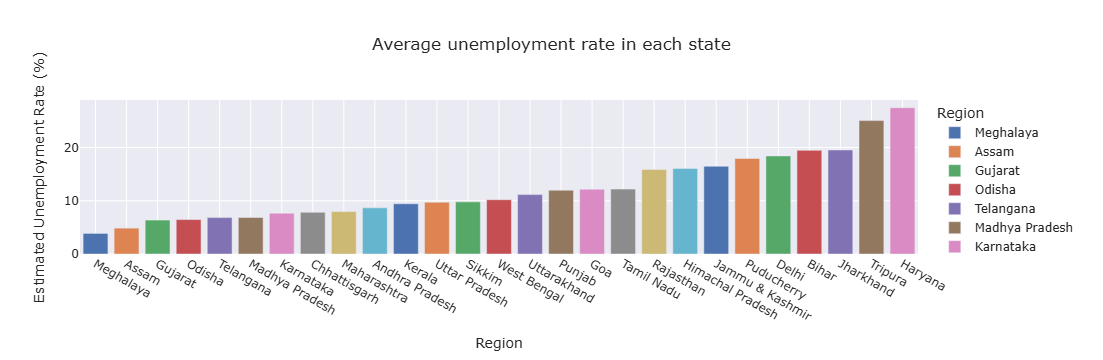

In [20]:
import plotly.express as px
plot_unemp = df[['Estimated Unemployment Rate (%)','Region']]
df_unemployed = plot_unemp.groupby('Region').mean().reset_index()

df_unemployed = df_unemployed.sort_values('Estimated Unemployment Rate (%)')

fig = px.bar(df_unemployed, x='Region',y='Estimated Unemployment Rate (%)',color = 'Region',title = 'Average unemployment rate in each state',
             template='seaborn')
fig.show()

The estimated unemployment rate is highest in Haryana. 

###### Visualizes the distribution of unemployment rates within different areas

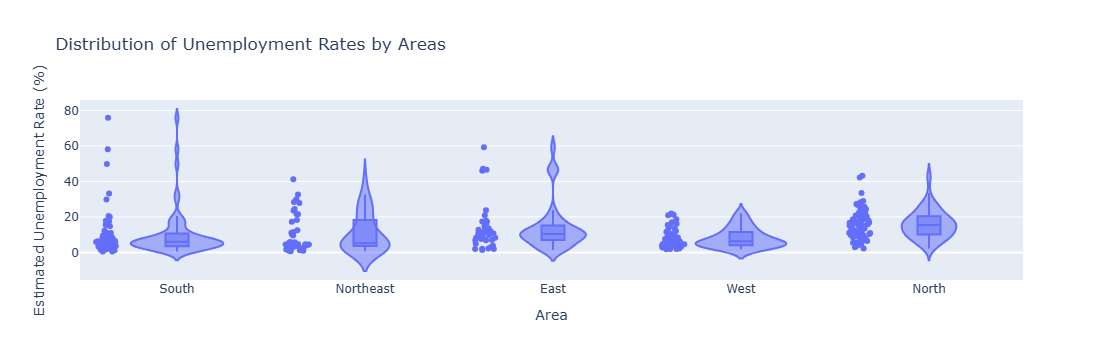

In [21]:
fig = px.violin(
    df,
    x='Area',
    y='Estimated Unemployment Rate (%)',
    title='Distribution of Unemployment Rates by Areas',
    box=True,  # Include box plot inside the violin
    points='all',  # Show individual data points
)

fig.show()

Since areas with wider or taller violins may have more variability in unemployment rates, south and east part of India experienced higher unemployment.

###### Composition of Labour Participation Rates by Region Over Time

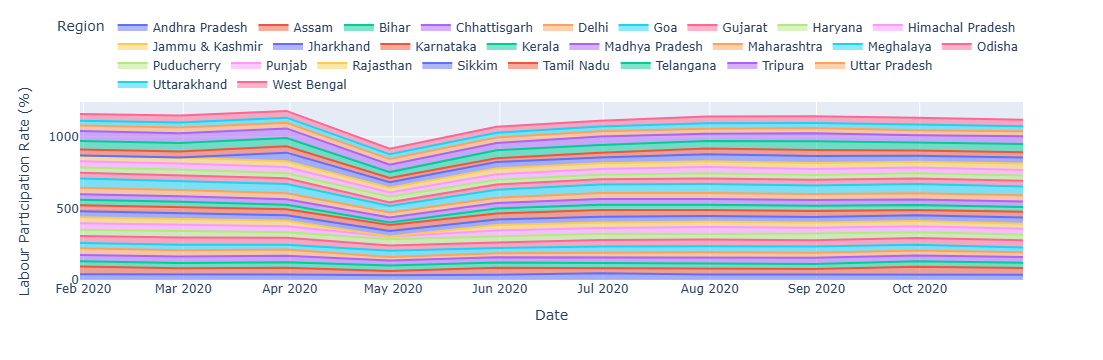

In [22]:
fig = px.area(
    df,
    x='Date',
    y='Estimated Labour Participation Rate (%)',
    color='Region',
    labels={'Estimated Labour Participation Rate (%)': 'Labour Participation Rate (%)'},
    category_orders={'Region': df['Region'].unique()}  # Preserve the order of regions
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Labour Participation Rate (%)',
    legend_title='Region',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
)

fig.show()

During the month of april labour participation declined all over India.

##### Extracting  month from date

In [23]:
df['Month'] = df['Date'].dt.month
df

Region       Date  Estimated Unemployment Rate (%)  \
0    Andhra Pradesh 2020-01-31                             5.48   
1    Andhra Pradesh 2020-02-29                             5.83   
2    Andhra Pradesh 2020-03-31                             5.79   
3    Andhra Pradesh 2020-04-30                            20.51   
4    Andhra Pradesh 2020-05-31                            17.43   
..              ...        ...                              ...   
262     West Bengal 2020-06-30                             7.29   
263     West Bengal 2020-07-31                             6.83   
264     West Bengal 2020-08-31                            14.87   
265     West Bengal 2020-09-30                             9.35   
266     West Bengal 2020-10-31                             9.98   

     Estimated Employed  Estimated Labour Participation Rate (%)   Area  \
0              16635535                                    41.02  South   
1              16545652                                    40.90  South   
2              15881197                                    39.18  South   
3              11336911                                    33.10  South   
4              12988845                                    36.46  South   
..                  ...                                      ...    ...   
262            30726310                                    40.39   East   
263            35372506                                    46.17   East   
264            33298644                                    47.48   East   
265            35707239                                    47.73   East   
266            33962549                                    45.63   East   

     Longitude  Latitude  Month  
0      15.9129    79.740      1  
1      15.9129    79.740      2  
2      15.9129    79.740      3  
3      15.9129    79.740      4  
4      15.9129    79.740      5  
..         ...       ...    ...  
262    22.9868    87.855      6  
263    22.9868    87.855      7  
264    22.9868    87.855      8  
265    22.9868    87.855      9  
266    22.9868    87.855     10  

[267 rows x 9 columns]

###### Percentage change in unemployment

In [32]:
# Filter data for months 1 to 3 (before lockdown)
before_lock = df[(df['Month'] >= 1) & (df['Month'] <= 3)][['Region', 'Estimated Unemployment Rate (%)']]

# Filter data for months 3 to 5 (after lockdown)
after_lock = df[(df['Month'] >= 3) & (df['Month'] < 6)][['Region', 'Estimated Unemployment Rate (%)']]

before_lock = before_lock.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index().rename(
    columns={'Estimated Unemployment Rate (%)':'Unemployment Rate before Lock-Down'})

after_lock = after_lock.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index().rename(
    columns={'Estimated Unemployment Rate (%)':'Unemployment Rate after Lock-Down'}) 

before_lock['Percentage Change in Unemployment'] = round((after_lock['Unemployment Rate after Lock-Down'] - before_lock['Unemployment Rate before Lock-Down']) / before_lock['Unemployment Rate before Lock-Down'], 2)

<Axes: xlabel='Percentage Change in Unemployment', ylabel='Region'>

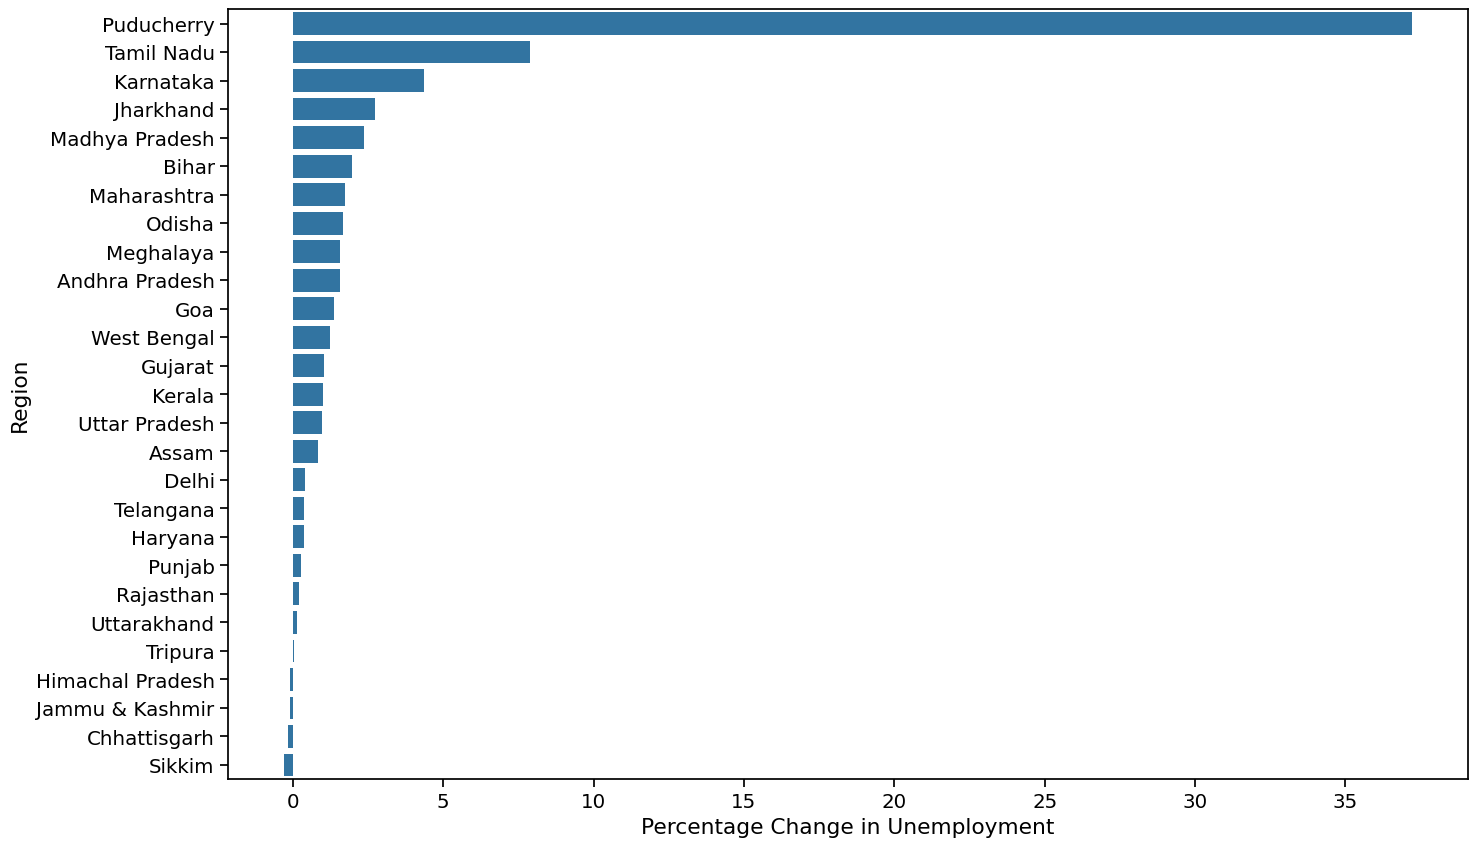

In [33]:
plot_df = before_lock.sort_values('Percentage Change in Unemployment', ascending=False)
plt.figure(figsize=(16, 10))
sns.barplot(data=plot_df, y='Region', x='Percentage Change in Unemployment')

If the percentage change is positive (+X%), it means that unemployment has increased by X% compared to the previous period. In other words, more people are unemployed.

If the percentage change is negative (-X%), it means that unemployment has decreased by X% compared to the previous period. Fewer people are unemployed.

The magnitude of the percentage change indicates how significant the change is. A larger percentage change suggests a more substantial shift in unemployment rates compared to a smaller percentage change.

Puducherry's unemployment rate had been seriously impacted by the lock-down. 

Sikkim, Chattisgarh, Jammu & Kashmir and Himachal Pradesh have negetive percentage change.That means these states are not highly impacted by the lock down.